In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge



In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ml project/26ML (1)/26ML/mlproject/aws_review.csv')


In [4]:
df = df.dropna()

In [5]:
df['helpful_ratio'] = df['helpful_votes'] / df['total_votes']

In [6]:
df['is_vine'] = df['vine'].apply(lambda x: 1 if x == 'Y' else 0)

In [7]:
df = df.assign(price=np.random.randint(10, 100, size=len(df)))
df = df.assign(quantity_sold=np.random.randint(1, 100, size=len(df)))
df = df.assign(cost=np.random.randint(5, 50, size=len(df)))

In [8]:
df['profit'] = df['price'] * df['quantity_sold'] - df['cost']

In [9]:
df.isnull().sum()

marketplace               0
state                     0
region                    0
customer_id               0
review_id                 0
product_id                0
product_parent            0
product_title             0
product_category          0
star_rating               0
helpful_votes             0
total_votes               0
vine                      0
verified_purchase         0
review_headline           0
review_body               0
review_date               0
helpful_ratio        720259
is_vine                   0
price                     0
quantity_sold             0
cost                      0
profit                    0
dtype: int64

In [10]:
# Select rel features
X = df[['star_rating', 'verified_purchase','product_category' , 'is_vine', 'price', 'cost', 'profit']]
y = df['quantity_sold']

In [11]:

le = LabelEncoder()
X['verified_purchase'] = le.fit_transform(X['verified_purchase'])
X['product_category'] = le.fit_transform(X['product_category'])

<ipython-input-11-6b3cf7d66c32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['verified_purchase'] = le.fit_transform(X['verified_purchase'])
<ipython-input-11-6b3cf7d66c32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['product_category'] = le.fit_transform(X['product_category'])


In [12]:
# Scalng num variable
scaler = MinMaxScaler()
X[['star_rating', 'product_category', 'price', 'cost', 'profit']] = scaler.fit_transform(X[['star_rating','product_category', 'price', 'cost', 'profit']])

<ipython-input-12-767f5d9c71d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['star_rating', 'product_category', 'price', 'cost', 'profit']] = scaler.fit_transform(X[['star_rating','product_category', 'price', 'cost', 'profit']])


In [13]:
split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [14]:
X_train[~np.isfinite(X_train)] = 0

y_train[~np.isfinite(y_train)] = 0



<ipython-input-14-b0e1da66e2e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[~np.isfinite(X_train)] = 0
<ipython-input-14-b0e1da66e2e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[~np.isfinite(X_train)] = 0


In [15]:
# Train a Linear Regression model using the LMS algo
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [16]:
X_test[~np.isfinite(X_test)] = 0
y_pred = lr.predict(X_test)

<ipython-input-16-7dc00850b2df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[~np.isfinite(X_test)] = 0
<ipython-input-16-7dc00850b2df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[~np.isfinite(X_test)] = 0


In [17]:
def mape(y_true, y_pred):
    """
    Compute Mean Absolute Percentage Error (MAPE).
    
    Args:
        y_true: true values
        y_pred: predicted values
        
    Returns:
        MAPE
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mape_val = mape(y_test, y_pred)
print("MAPE: ", mape_val)


MAPE:  69.96691666286767


In [37]:
new_product = pd.DataFrame({
    'star_rating': 4.5,
    'verified_purchase': 'Y',
    'is_vine': 'N',
    'price': 28.99,
    'cost': 10.99,
    'profit': 34.00,
    'product_category': 'grocery'
}, index=[0])

In [38]:
le = LabelEncoder()
new_product['verified_purchase_encoded'] = le.fit_transform(new_product['verified_purchase'])
new_product['is_vine_encoded'] = le.fit_transform(new_product['is_vine'])
new_product['product_category_encoded'] = le.fit_transform(new_product['product_category'])

In [40]:
# Remove the original fea
new_product.drop(['verified_purchase', 'is_vine','product_category'], axis=1, inplace=True)

In [41]:
quantity_sold = lr.predict(new_product)[0]
quantity_sold =int(quantity_sold)

ValueError: ignored

In [42]:
print("Predicted sales, quantity sold:", quantity_sold)

NameError: ignored

In [43]:
most_profitable_products = df.sort_values('profit', ascending=False)

# Print the top 10 most profitable products
print(most_profitable_products[['product_title', 'profit']].head(10))

                                            product_title  profit
123827  Crawfords Garibaldi Biscuits, 100 Gram (Pack o...    9796
295412  Nestle, KitKat Maccha Green Tea Flavor 4.9oz J...    9796
970351  POPwater Sparkling Fruit Flavored Beverage,  1...    9794
143415  Vivente Zero Calorie Organic Sweetener with Fi...    9794
395272  Hoosier Hill Farm Charms Cereal Marshmallows, ...    9794
423073     Nature'S Secret Urinary Cleanse & Flush 60 Cap    9793
189591                        Amazing Grass Kidz Formulas    9793
821303  Terrasoul Superfoods Sun-dried White Mulberrie...    9792
20020             Lundberg Organic Short Grain Brown Rice    9792
816139  Sanders Hot Fudge (Cinnamon Pear Caramel Toppi...    9792


In [44]:
from sklearn.cluster import KMeans


In [46]:
df = pd.read_csv('/content/gdrive/MyDrive/ml project/26ML (1)/26ML/mlproject/aws_review.csv')


In [47]:
df = df.dropna()

In [48]:
df = df.assign(price=np.random.randint(10, 100, size=len(df)))
df = df.assign(quantity_sold=np.random.randint(1, 100, size=len(df)))
df = df.assign(cost=np.random.randint(5, 50, size=len(df)))

In [49]:
df['profit'] = df['price'] * df['quantity_sold'] - df['cost']

In [50]:
df

,marketplace,state,region,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,...,total_votes,vine,verified_purchase,review_headline,review_body,review_date,price,quantity_sold,cost,profit
0,US,Illinois,Central,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,...,0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",8/31/2015,86,2,40,132
1,US,Arizona,West,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,...,0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",8/31/2015,90,89,12,7998
2,US,California,West,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,...,0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,8/31/2015,40,65,32,2568
3,US,Virginia,South,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,...,0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,8/31/2015,96,65,31,6209
4,US,Ohio,East,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,...,0,N,Y,Five Stars,good,8/31/2015,56,75,6,4194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048478,US,California,West,42660988,R3T93ZYM7YPW10,B00F7P5BZ2,323508783,Walkers Meaty Variety 14 Pack,Grocery,5,...,0,N,Y,Five Stars,These are great and tasty. And the best part ...,8/25/2014,59,35,29,2036
1048479,US,New York,East,14119718,R13Z1BZM04QQLE,B004WZ4CYY,553863420,Better Bowls,Grocery,5,...,0,N,N,Love it.,Love it.. Its a little gritty compared to Jell...,8/25/2014,73,27,9,1962
1048480,US,California,West,15184231,R23BU4F23LRKKV,B00E4XGKHQ,160324902,Pomegranate Bonsai - Ships 2nd Day Air - Live ...,Grocery,4,...,1,N,Y,Four Stars,"Pictured with fruit, actual plant had none, lo...",8/25/2014,12,5,35,25
1048481,US,Colorado,West,48630800,R2PHKBUY3YY5FD,B00JZLX390,698556635,"Altoids Artic Mints, 1.2 Ounce (Pack of 8)",Grocery,5,...,0,N,N,Five Stars,Love these mints,8/25/2014,65,50,38,3212


In [51]:
# Extract the features of interest
X = df[['state', 'quantity_sold']]

In [52]:
X

,state,quantity_sold
0,Illinois,2
1,Arizona,89
2,California,65
3,Virginia,65
4,Ohio,75
...,...,...
1048478,California,35
1048479,New York,27
1048480,California,5
1048481,Colorado,50


In [53]:
X['state'] = pd.Categorical(X['state']).codes


<ipython-input-53-6c395502e793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'] = pd.Categorical(X['state']).codes


In [54]:
state_sales = df.groupby('state')['quantity_sold'].sum().reset_index()

In [55]:
scaler = StandardScaler()
state_sales['quantity_sold_scaled'] = scaler.fit_transform(state_sales[['quantity_sold']])

In [56]:
scaler = StandardScaler()
state_sales['quantity_sold_scaled'] = scaler.fit_transform(state_sales[['quantity_sold']])

In [64]:
kmeans = KMeans()

In [66]:
# Add the cluster labels to the state_sales DataFrame
state_sales['cluster'] = kmeans.labels_

AttributeError: ignored

In [68]:
# Print the count of states in each cluster
print(state_sales['cluster'].value_counts())

KeyError: ignored

In [67]:
print(state_sales)

                   state  quantity_sold  quantity_sold_scaled
0                Alabama         323262             -0.410031
1                Arizona        1168195              0.053832
2               Arkansas         315782             -0.414138
3             California       10484022              5.168165
4               Colorado         943167             -0.069707
5            Connecticut         428952             -0.352008
6               Delaware         505543             -0.309960
7   District of Columbia          52689             -0.558574
8                Florida        2024726              0.524062
9                Georgia         970595             -0.054649
10                 Idaho         113744             -0.525055
11              Illinois        2583810              0.830996
12               Indiana         798200             -0.149293
13                  Iowa         158461             -0.500506
14                Kansas         126353             -0.518133
15      

In [69]:
print(state_sales['quantity_sold'])

0       323262
1      1168195
2       315782
3     10484022
4       943167
5       428952
6       505543
7        52689
8      2024726
9       970595
10      113744
11     2583810
12      798200
13      158461
14      126353
15      726391
16      218534
17       42159
18      564096
19      701807
20     1327674
21      460755
22      274366
23      343930
24       78186
25      203405
26      204209
27      144834
28      674555
29      192912
30     5898218
31     1304278
32       38958
33     2470745
34      342979
35      655842
36     3067397
37      296466
38      214517
39       63744
40      973642
41     5175525
42      278021
43       56800
44     1181820
45     2659422
46       20616
47      577959
48        4555
Name: quantity_sold, dtype: int64


In [70]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.6 MB/s eta 0:00:00


In [71]:
import folium
from branca.colormap import linear
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap





In [72]:
usa_state = df["state"]
sales_by_state = df.groupby('state')['quantity_sold'].sum().reset_index()
print(sales_by_state)


                   state  quantity_sold
0                Alabama         323262
1                Arizona        1168195
2               Arkansas         315782
3             California       10484022
4               Colorado         943167
5            Connecticut         428952
6               Delaware         505543
7   District of Columbia          52689
8                Florida        2024726
9                Georgia         970595
10                 Idaho         113744
11              Illinois        2583810
12               Indiana         798200
13                  Iowa         158461
14                Kansas         126353
15              Kentucky         726391
16             Louisiana         218534
17                 Maine          42159
18              Maryland         564096
19         Massachusetts         701807
20              Michigan        1327674
21             Minnesota         460755
22           Mississippi         274366
23              Missouri         343930


In [73]:
usa_state_dataframe = pd.DataFrame({'state': df['state'].unique()})
usa_state_dataframe = pd.merge(usa_state_dataframe, sales_by_state, on='state')
print(usa_state_dataframe)


                   state  quantity_sold
0               Illinois        2583810
1                Arizona        1168195
2             California       10484022
3               Virginia        1181820
4                   Ohio        2470745
5             Washington        2659422
6                  Texas        5175525
7               Colorado         943167
8              Tennessee         973642
9               New York        5898218
10           Connecticut         428952
11               Alabama         323262
12               Georgia         970595
13          Pennsylvania        3067397
14              Maryland         564096
15                Nevada         204209
16        North Carolina        1304278
17                Oregon         655842
18              Michigan        1327674
19               Indiana         798200
20         Massachusetts         701807
21                 Maine          42159
22               Florida        2024726
23              Oklahoma         342979


In [75]:
# url of our shape file 
path_geo = '/content/gdrive/MyDrive/ml project/26ML (1)/26ML/mlproject/cb_2018_us_state_500k'

# load the shape file using geopandas
geo_usa = gpd.read_file(path_geo+'/cb_2018_us_state_500k.shp')


# merge usa_state data and geo_usa shapefile
geo_merge = geo_usa.merge(usa_state_dataframe, left_on='NAME', right_on='state')

In [77]:
!pip install --upgrade mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


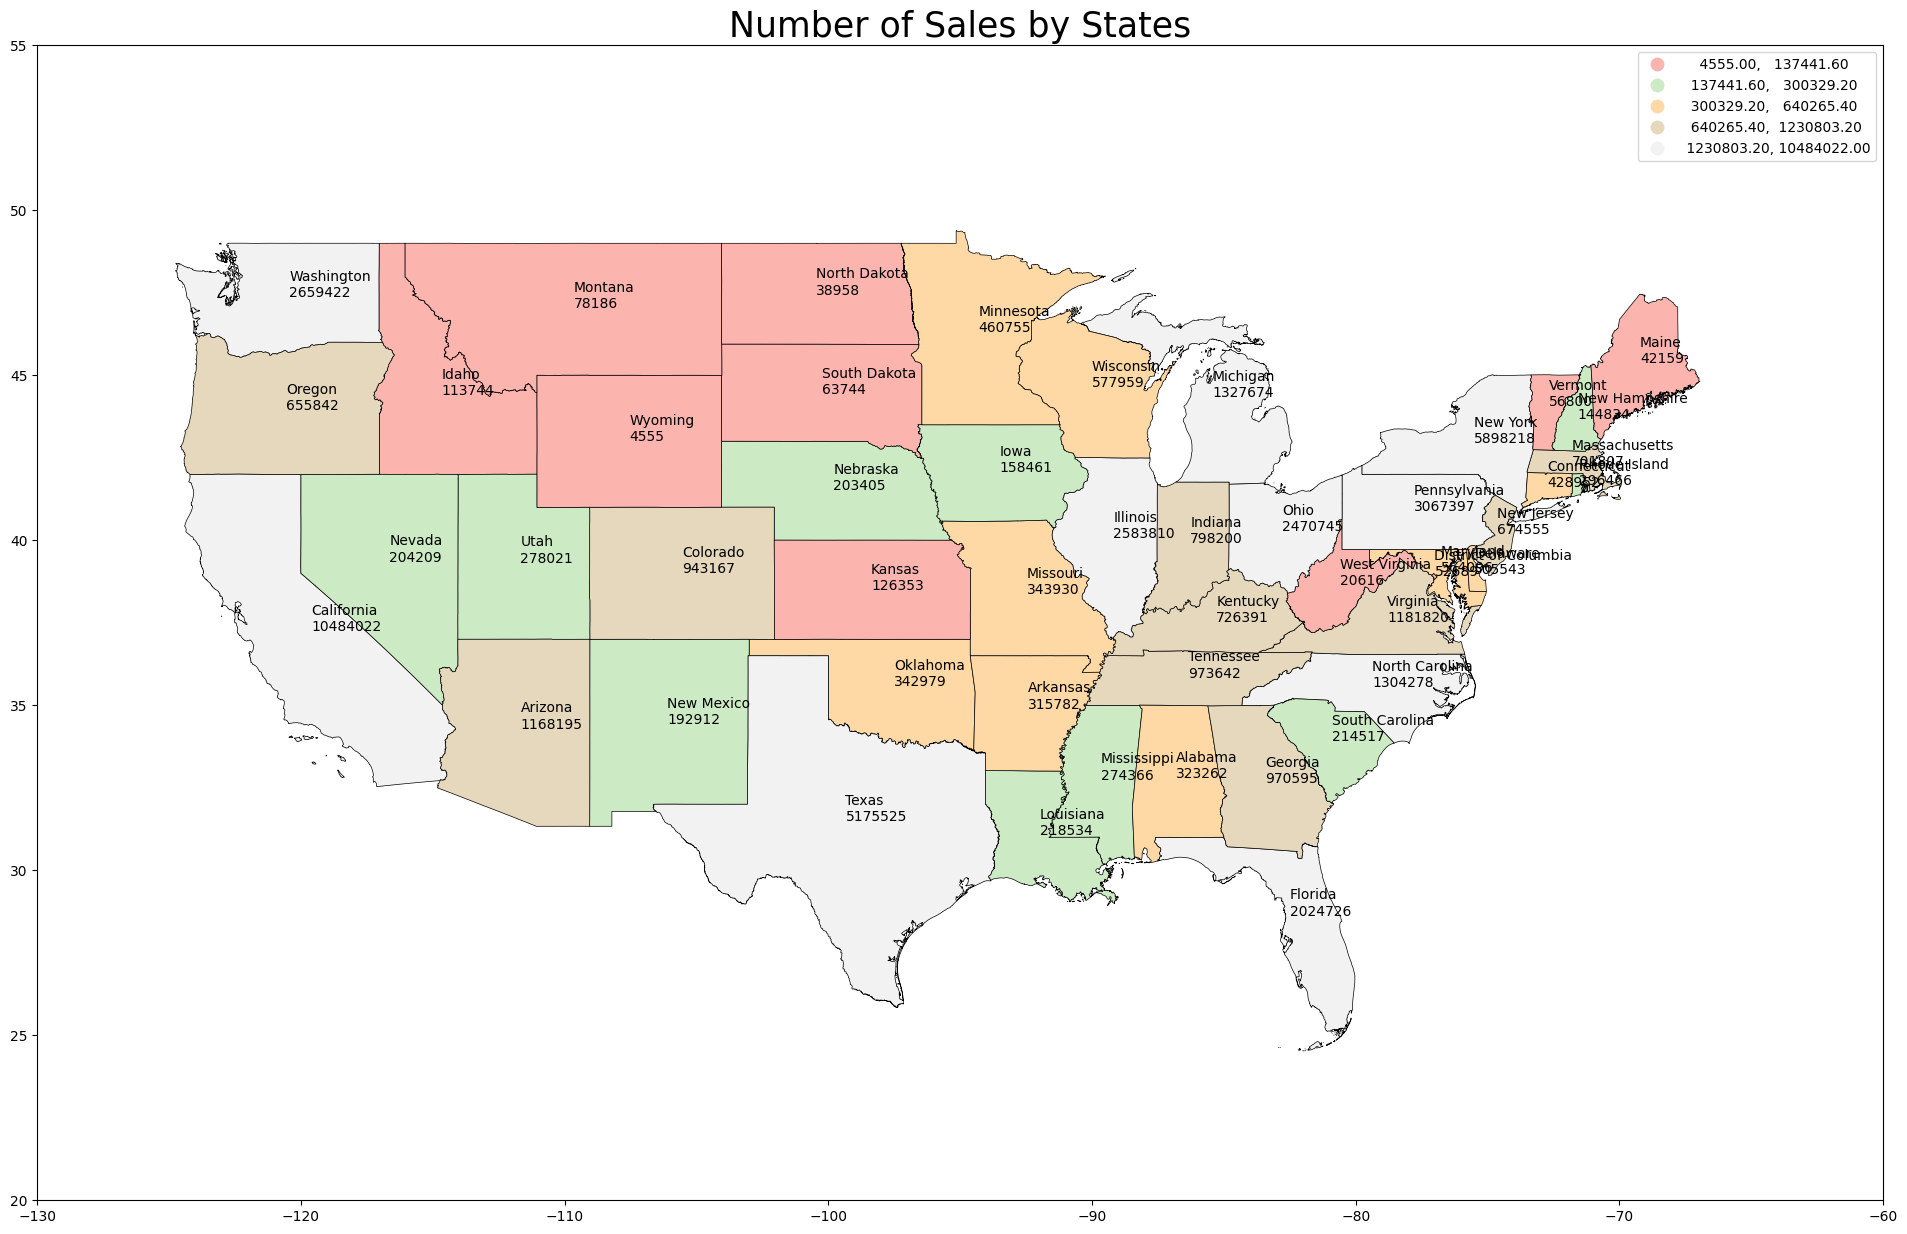

In [78]:
# plot USA state map 
geo_merge.plot(column='quantity_sold', scheme="quantiles",  figsize=(25, 15),legend=True,cmap='Pastel1',linewidth=0.5, edgecolor='black')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add state names and numbers 
for idx, row in geo_merge.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, "{}\n{}".format(row.NAME, row["quantity_sold"]), size=10)

plt.title('Number of Sales by States', fontsize=25)
plt.show()

In [79]:
usa_state1 = df["state"]
profit_by_state = df.groupby('state')['profit'].sum().reset_index()
print(profit_by_state)

                   state     profit
0                Alabama   17465499
1                Arizona   62981411
2               Arkansas   16908609
3             California  565688158
4               Colorado   50960244
5            Connecticut   23011893
6               Delaware   27035396
7   District of Columbia    2875262
8                Florida  109173285
9                Georgia   51998446
10                 Idaho    6212209
11              Illinois  139231810
12               Indiana   43089983
13                  Iowa    8493979
14                Kansas    6864444
15              Kentucky   39049398
16             Louisiana   11931100
17                 Maine    2240068
18              Maryland   30202434
19         Massachusetts   38039872
20              Michigan   71728392
21             Minnesota   24797861
22           Mississippi   14651986
23              Missouri   18522155
24               Montana    4266876
25              Nebraska   10935701
26                Nevada   1

In [80]:
usa_state_dataframe1 = pd.DataFrame({'state': df['state'].unique()})
usa_state_dataframe1 = pd.merge(usa_state_dataframe1, profit_by_state, on='state')
print(usa_state_dataframe1)


                   state     profit
0               Illinois  139231810
1                Arizona   62981411
2             California  565688158
3               Virginia   64085498
4                   Ohio  132923346
5             Washington  143506850
6                  Texas  278774079
7               Colorado   50960244
8              Tennessee   52880196
9               New York  318230443
10           Connecticut   23011893
11               Alabama   17465499
12               Georgia   51998446
13          Pennsylvania  165816604
14              Maryland   30202434
15                Nevada   11146198
16        North Carolina   70412402
17                Oregon   35428074
18              Michigan   71728392
19               Indiana   43089983
20         Massachusetts   38039872
21                 Maine    2240068
22               Florida  109173285
23              Oklahoma   18791406
24                  Iowa    8493979
25                  Utah   14901130
26          Rhode Island   1

In [81]:
path_geo = '/content/gdrive/MyDrive/ml project/26ML (1)/26ML/mlproject/cb_2018_us_state_500k'

geo_usa = gpd.read_file(path_geo+'/cb_2018_us_state_500k.shp')

geo_merge = geo_usa.merge(usa_state_dataframe1, left_on='NAME', right_on='state')

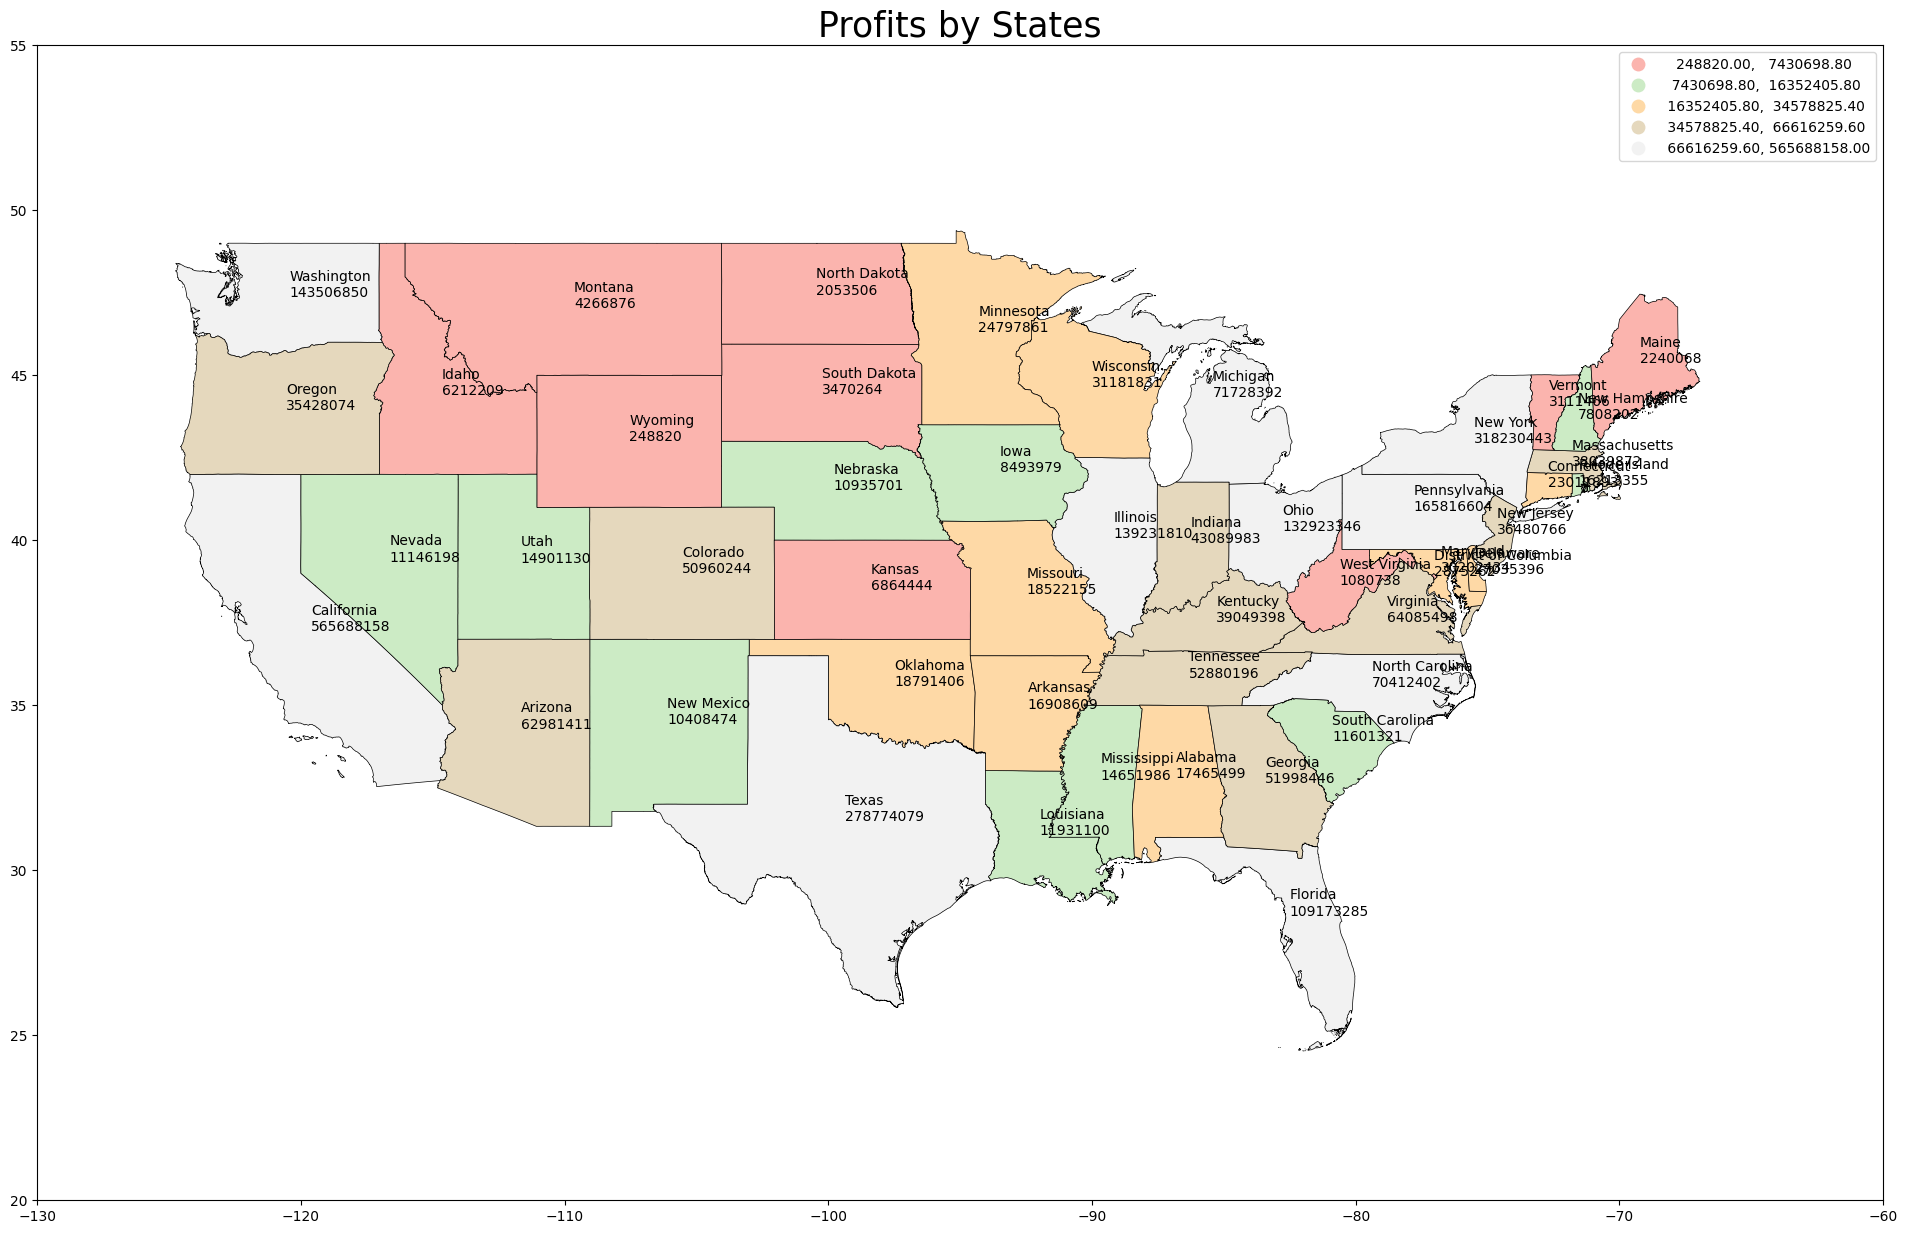

In [82]:
geo_merge.plot(column='profit', scheme="quantiles",  figsize=(25, 15),legend=True,cmap='Pastel1',linewidth=0.5, edgecolor='black')
plt.xlim(-130,-60)
plt.ylim(20,55)
for idx, row in geo_merge.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, "{}\n{}".format(row.NAME, row["profit"]), size=10)

plt.title('Profits by States', fontsize=25)
plt.show()

In [83]:
df['review_date'] = pd.to_datetime(df['review_date'], infer_datetime_format=True)

In [84]:
df['year'] = df['review_date'].dt.year

In [85]:

import random

df['discount'] = df.apply(lambda x: random.uniform(0.0, 0.5) if x['product_category'] == 'Grocery' else random.uniform(0.0, 0.2), axis=1)

In [86]:
# Calculate the total sales and profits per year
sales_per_year = df.groupby('year')['quantity_sold'].sum()
profits_per_year = df.groupby('year')['profit'].sum()
discount_per_year = df.groupby('year')['discount'].sum()


In [87]:
print(sales_per_year)

year
2014    15742830
2015    36693988
Name: quantity_sold, dtype: int64


In [88]:
print(profits_per_year)

year
2014     849519689
2015    1979391751
Name: profit, dtype: int64


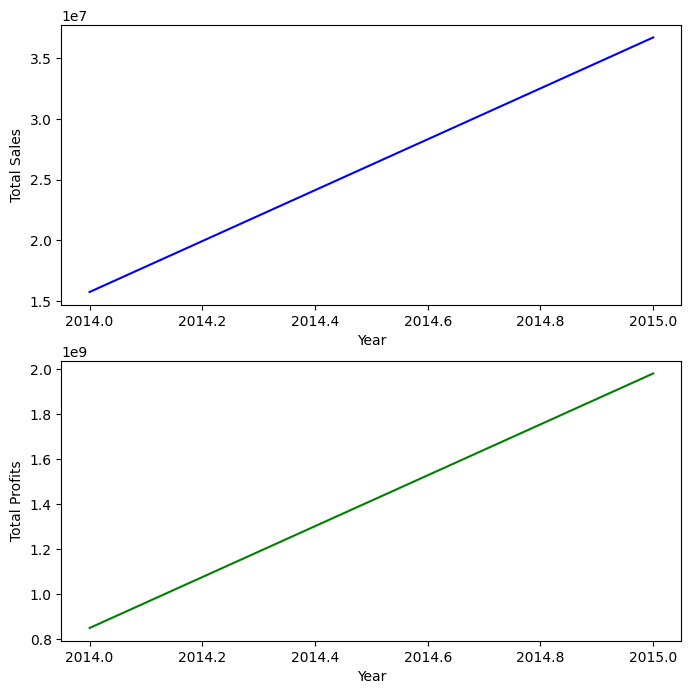

In [89]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
# Plot the sales per year
ax1.plot(sales_per_year.index, sales_per_year.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales')

# Plot the profits per year
ax2.plot(profits_per_year.index, profits_per_year.values, color='green')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Profits')




# Show the plot
plt.show()

Text(0, 0.5, 'Discounts')

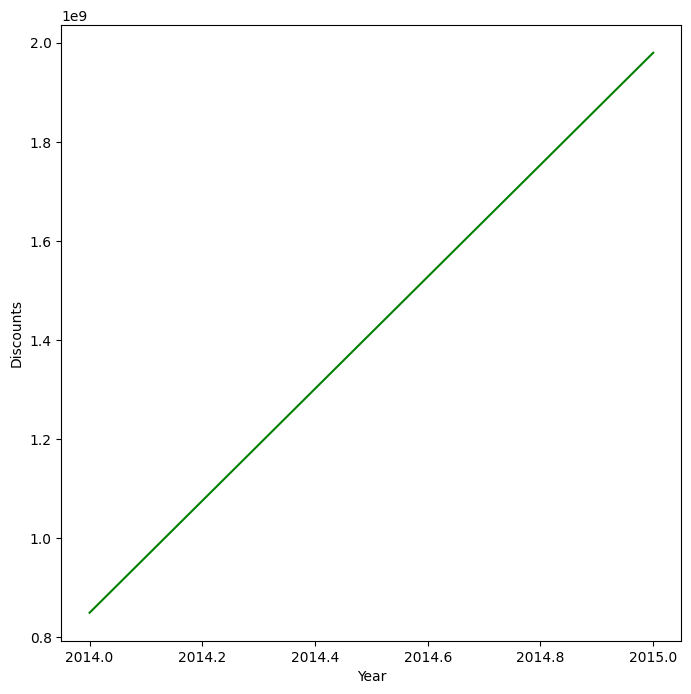

In [90]:
# Create a figure with two subplots for sales and profits
fig, (ax3) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Plot the profits per year
ax3.plot(profits_per_year.index, profits_per_year.values, color='green')
ax3.set_xlabel('Year')
ax3.set_ylabel('Discounts')